In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
class CustomModelCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, filepath, save_weights_only=False):
        super().__init__()
        self.filepath = filepath
        self.save_weights_only = save_weights_only

    def on_epoch_end(self, epoch, logs=None):
        filepath = self.filepath.format(epoch=epoch + 1, **logs)
        if self.save_weights_only:
            self.model.save_weights(filepath)
        else:
            self.model.save(filepath)
        print(f"\nSaved model at epoch {epoch + 1} to {filepath}")

# Model checkpoint callback
cp_callback = CustomModelCheckpoint(
    filepath=model_save_path, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3358 - loss: 1.5128


Saved model at epoch 1 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3363 - loss: 1.5117 - val_accuracy: 0.4590 - val_loss: 1.3652
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4453 - loss: 1.3681


Saved model at epoch 2 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3988 - loss: 1.3853 - val_accuracy: 0.5435 - val_loss: 1.2407
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4609 - loss: 1.2273


Saved model at epoch 3 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4351 - loss: 1.2857 - val_accuracy: 0.5684 - val_loss: 1.1283
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4453 - loss: 1.2412


Saved model at epoch 4 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4545 - loss: 1.2169 - val_accuracy: 0.6313 - val_loss: 1.0379
Epoch 5/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4688 - loss: 1.1501


Saved model at epoch 5 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4970 - loss: 1.1387 - val_accuracy: 0.6744 - val_loss: 0.9713
Epoch 6/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 1.1622


Saved model at epoch 6 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5088 - loss: 1.1109 - val_accuracy: 0.6968 - val_loss: 0.9142
Epoch 7/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4922 - loss: 1.1078


Saved model at epoch 7 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5242 - loss: 1.0666 - val_accuracy: 0.7357 - val_loss: 0.8718
Epoch 8/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5312 - loss: 1.0499


Saved model at epoch 8 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5568 - loss: 1.0276 - val_accuracy: 0.7904 - val_loss: 0.8231
Epoch 9/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5626 - loss: 1.0019 


Saved model at epoch 9 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5629 - loss: 1.0016 - val_accuracy: 0.7929 - val_loss: 0.7835
Epoch 10/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5078 - loss: 0.9711


Saved model at epoch 10 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5669 - loss: 0.9864 - val_accuracy: 0.7995 - val_loss: 0.7510
Epoch 11/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4922 - loss: 1.0315


Saved model at epoch 11 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5830 - loss: 0.9540 - val_accuracy: 0.8086 - val_loss: 0.7124
Epoch 12/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4922 - loss: 1.0895


Saved model at epoch 12 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 0.9373 - val_accuracy: 0.8335 - val_loss: 0.6786
Epoch 13/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6094 - loss: 0.9518


Saved model at epoch 13 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5955 - loss: 0.9189 - val_accuracy: 0.8318 - val_loss: 0.6570
Epoch 14/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6484 - loss: 0.8095


Saved model at epoch 14 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6289 - loss: 0.8598 - val_accuracy: 0.8442 - val_loss: 0.6274
Epoch 15/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5781 - loss: 0.9138


Saved model at epoch 15 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6205 - loss: 0.8744 - val_accuracy: 0.8459 - val_loss: 0.6023
Epoch 16/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6172 - loss: 0.8613


Saved model at epoch 16 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6392 - loss: 0.8591 - val_accuracy: 0.8633 - val_loss: 0.5750
Epoch 17/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.8401 


Saved model at epoch 17 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6398 - loss: 0.8396 - val_accuracy: 0.8716 - val_loss: 0.5589
Epoch 18/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6641 - loss: 0.8303


Saved model at epoch 18 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6414 - loss: 0.8452 - val_accuracy: 0.8757 - val_loss: 0.5430
Epoch 19/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6250 - loss: 0.7934


Saved model at epoch 19 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 0.8099 - val_accuracy: 0.8973 - val_loss: 0.5238
Epoch 20/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6719 - loss: 0.8734


Saved model at epoch 20 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6726 - loss: 0.8092 - val_accuracy: 0.8890 - val_loss: 0.5067
Epoch 21/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6562 - loss: 0.7860


Saved model at epoch 21 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.7867 - val_accuracy: 0.9080 - val_loss: 0.4859
Epoch 22/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7734 - loss: 0.6477


Saved model at epoch 22 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.7580 - val_accuracy: 0.9122 - val_loss: 0.4670
Epoch 23/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7031 - loss: 0.7152


Saved model at epoch 23 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.7588 - val_accuracy: 0.9089 - val_loss: 0.4563
Epoch 24/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6797 - loss: 0.7888


Saved model at epoch 24 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.7410 - val_accuracy: 0.9114 - val_loss: 0.4483
Epoch 25/1000
21/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7384  


Saved model at epoch 25 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6935 - loss: 0.7382 - val_accuracy: 0.9097 - val_loss: 0.4411
Epoch 26/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7266 - loss: 0.6388


Saved model at epoch 26 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6970 - loss: 0.7179 - val_accuracy: 0.9122 - val_loss: 0.4299
Epoch 27/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7188 - loss: 0.6653


Saved model at epoch 27 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7102 - loss: 0.7206 - val_accuracy: 0.9205 - val_loss: 0.4197
Epoch 28/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7422 - loss: 0.6174


Saved model at epoch 28 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.7052 - val_accuracy: 0.9196 - val_loss: 0.4047
Epoch 29/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6859


Saved model at epoch 29 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7197 - loss: 0.7035 - val_accuracy: 0.9205 - val_loss: 0.3960
Epoch 30/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.7422 - loss: 0.7315


Saved model at epoch 30 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.7042 - val_accuracy: 0.9246 - val_loss: 0.3880
Epoch 31/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7188 - loss: 0.8046


Saved model at epoch 31 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.6984 - val_accuracy: 0.9337 - val_loss: 0.3854
Epoch 32/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7188 - loss: 0.6448


Saved model at epoch 32 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.6797 - val_accuracy: 0.9279 - val_loss: 0.3754
Epoch 33/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7109 - loss: 0.6404


Saved model at epoch 33 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.6590 - val_accuracy: 0.9279 - val_loss: 0.3636
Epoch 34/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7500 - loss: 0.6551


Saved model at epoch 34 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7312 - loss: 0.6629 - val_accuracy: 0.9321 - val_loss: 0.3616
Epoch 35/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7500 - loss: 0.6373


Saved model at epoch 35 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.6570 - val_accuracy: 0.9271 - val_loss: 0.3503
Epoch 36/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7500 - loss: 0.7001


Saved model at epoch 36 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.6555 - val_accuracy: 0.9337 - val_loss: 0.3485
Epoch 37/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7422 - loss: 0.6211


Saved model at epoch 37 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7291 - loss: 0.6797 - val_accuracy: 0.9312 - val_loss: 0.3469
Epoch 38/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7656 - loss: 0.5986


Saved model at epoch 38 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7445 - loss: 0.6540 - val_accuracy: 0.9362 - val_loss: 0.3413
Epoch 39/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7656 - loss: 0.5697


Saved model at epoch 39 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7566 - loss: 0.6363 - val_accuracy: 0.9304 - val_loss: 0.3355
Epoch 40/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7734 - loss: 0.5861


Saved model at epoch 40 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.6199 - val_accuracy: 0.9337 - val_loss: 0.3257
Epoch 41/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.5982


Saved model at epoch 41 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7447 - loss: 0.6215 - val_accuracy: 0.9271 - val_loss: 0.3295
Epoch 42/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7344 - loss: 0.5902


Saved model at epoch 42 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.6408 - val_accuracy: 0.9304 - val_loss: 0.3205
Epoch 43/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7031 - loss: 0.6978


Saved model at epoch 43 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7493 - loss: 0.6336 - val_accuracy: 0.9379 - val_loss: 0.3159
Epoch 44/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8203 - loss: 0.5464


Saved model at epoch 44 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7730 - loss: 0.6085 - val_accuracy: 0.9312 - val_loss: 0.3098
Epoch 45/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7969 - loss: 0.6199


Saved model at epoch 45 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.6471 - val_accuracy: 0.9345 - val_loss: 0.3091
Epoch 46/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7578 - loss: 0.5525


Saved model at epoch 46 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7628 - loss: 0.6058 - val_accuracy: 0.9354 - val_loss: 0.3092
Epoch 47/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7812 - loss: 0.5766


Saved model at epoch 47 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7617 - loss: 0.6123 - val_accuracy: 0.9329 - val_loss: 0.3100
Epoch 48/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6953 - loss: 0.6935


Saved model at epoch 48 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7370 - loss: 0.6409 - val_accuracy: 0.9461 - val_loss: 0.3046
Epoch 49/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.5904


Saved model at epoch 49 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.6024 - val_accuracy: 0.9461 - val_loss: 0.2904
Epoch 50/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7656 - loss: 0.6638


Saved model at epoch 50 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.6109 - val_accuracy: 0.9445 - val_loss: 0.2829
Epoch 51/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7422 - loss: 0.6745


Saved model at epoch 51 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.6143 - val_accuracy: 0.9387 - val_loss: 0.2911
Epoch 52/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7188 - loss: 0.6826


Saved model at epoch 52 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7654 - loss: 0.6194 - val_accuracy: 0.9304 - val_loss: 0.2960
Epoch 53/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8047 - loss: 0.5052


Saved model at epoch 53 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7680 - loss: 0.5983 - val_accuracy: 0.9478 - val_loss: 0.2869
Epoch 54/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.8203 - loss: 0.5348


Saved model at epoch 54 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7841 - loss: 0.5758 - val_accuracy: 0.9453 - val_loss: 0.2897
Epoch 55/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8281 - loss: 0.4998


Saved model at epoch 55 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.5517 - val_accuracy: 0.9461 - val_loss: 0.2787
Epoch 56/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8125 - loss: 0.5497


Saved model at epoch 56 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7881 - loss: 0.5626 - val_accuracy: 0.9453 - val_loss: 0.2756
Epoch 57/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7734 - loss: 0.5854


Saved model at epoch 57 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.5951 - val_accuracy: 0.9420 - val_loss: 0.2804
Epoch 58/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7500 - loss: 0.5992


Saved model at epoch 58 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7697 - loss: 0.5934 - val_accuracy: 0.9503 - val_loss: 0.2712
Epoch 59/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8203 - loss: 0.5639


Saved model at epoch 59 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 0.5843 - val_accuracy: 0.9503 - val_loss: 0.2651
Epoch 60/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8203 - loss: 0.5369


Saved model at epoch 60 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7932 - loss: 0.5710 - val_accuracy: 0.9354 - val_loss: 0.2738
Epoch 61/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7969 - loss: 0.5530


Saved model at epoch 61 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7785 - loss: 0.5690 - val_accuracy: 0.9519 - val_loss: 0.2615
Epoch 62/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8047 - loss: 0.4893


Saved model at epoch 62 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.5544 - val_accuracy: 0.9453 - val_loss: 0.2670
Epoch 63/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7656 - loss: 0.5871


Saved model at epoch 63 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7835 - loss: 0.5568 - val_accuracy: 0.9503 - val_loss: 0.2664
Epoch 64/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7578 - loss: 0.6070


Saved model at epoch 64 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7822 - loss: 0.5713 - val_accuracy: 0.9495 - val_loss: 0.2606
Epoch 65/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8047 - loss: 0.5179


Saved model at epoch 65 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.5611 - val_accuracy: 0.9503 - val_loss: 0.2598
Epoch 66/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.5619 


Saved model at epoch 66 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7766 - loss: 0.5617 - val_accuracy: 0.9478 - val_loss: 0.2597
Epoch 67/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7500 - loss: 0.6819


Saved model at epoch 67 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7987 - loss: 0.5523 - val_accuracy: 0.9503 - val_loss: 0.2550
Epoch 68/1000
19/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.5707 


Saved model at epoch 68 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7858 - loss: 0.5707 - val_accuracy: 0.9412 - val_loss: 0.2595
Epoch 69/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7891 - loss: 0.5403


Saved model at epoch 69 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7874 - loss: 0.5563 - val_accuracy: 0.9461 - val_loss: 0.2544
Epoch 70/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7578 - loss: 0.5873


Saved model at epoch 70 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5481 - val_accuracy: 0.9536 - val_loss: 0.2494
Epoch 71/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7500 - loss: 0.6057


Saved model at epoch 71 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.5642 - val_accuracy: 0.9553 - val_loss: 0.2450
Epoch 72/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8438 - loss: 0.6045


Saved model at epoch 72 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.5727 - val_accuracy: 0.9478 - val_loss: 0.2521
Epoch 73/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8438 - loss: 0.4876


Saved model at epoch 73 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.5480 - val_accuracy: 0.9536 - val_loss: 0.2544
Epoch 74/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8203 - loss: 0.5082


Saved model at epoch 74 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.5350 - val_accuracy: 0.9495 - val_loss: 0.2503
Epoch 75/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8281 - loss: 0.6016


Saved model at epoch 75 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5678 - val_accuracy: 0.9519 - val_loss: 0.2486
Epoch 76/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8281 - loss: 0.4745


Saved model at epoch 76 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.5315 - val_accuracy: 0.9461 - val_loss: 0.2497
Epoch 77/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7812 - loss: 0.6697


Saved model at epoch 77 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.5614 - val_accuracy: 0.9503 - val_loss: 0.2484
Epoch 78/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7578 - loss: 0.5969


Saved model at epoch 78 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7882 - loss: 0.5690 - val_accuracy: 0.9553 - val_loss: 0.2456
Epoch 79/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8203 - loss: 0.4684


Saved model at epoch 79 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8128 - loss: 0.5112 - val_accuracy: 0.9536 - val_loss: 0.2395
Epoch 80/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8203 - loss: 0.4738


Saved model at epoch 80 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.5315 - val_accuracy: 0.9536 - val_loss: 0.2421
Epoch 81/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8672 - loss: 0.4310


Saved model at epoch 81 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8120 - loss: 0.5113 - val_accuracy: 0.9486 - val_loss: 0.2432
Epoch 82/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7812 - loss: 0.5231


Saved model at epoch 82 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5422 - val_accuracy: 0.9511 - val_loss: 0.2389
Epoch 83/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7656 - loss: 0.5648


Saved model at epoch 83 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953 - loss: 0.5384 - val_accuracy: 0.9461 - val_loss: 0.2444
Epoch 84/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7891 - loss: 0.6268


Saved model at epoch 84 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.5460 - val_accuracy: 0.9519 - val_loss: 0.2322
Epoch 85/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7812 - loss: 0.5402


Saved model at epoch 85 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.5543 - val_accuracy: 0.9478 - val_loss: 0.2407
Epoch 86/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8203 - loss: 0.4640


Saved model at epoch 86 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.5358 - val_accuracy: 0.9536 - val_loss: 0.2320
Epoch 87/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7891 - loss: 0.5312


Saved model at epoch 87 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8028 - loss: 0.5243 - val_accuracy: 0.9478 - val_loss: 0.2424
Epoch 88/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7891 - loss: 0.5771


Saved model at epoch 88 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.5140 - val_accuracy: 0.9553 - val_loss: 0.2315
Epoch 89/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7812 - loss: 0.5360


Saved model at epoch 89 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8024 - loss: 0.5287 - val_accuracy: 0.9519 - val_loss: 0.2359
Epoch 90/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8281 - loss: 0.4995


Saved model at epoch 90 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8154 - loss: 0.5085 - val_accuracy: 0.9519 - val_loss: 0.2322
Epoch 91/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7812 - loss: 0.4885


Saved model at epoch 91 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.5180 - val_accuracy: 0.9519 - val_loss: 0.2361
Epoch 92/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8047 - loss: 0.5239


Saved model at epoch 92 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.5371 - val_accuracy: 0.9519 - val_loss: 0.2338
Epoch 93/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7422 - loss: 0.7001


Saved model at epoch 93 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.5572 - val_accuracy: 0.9511 - val_loss: 0.2298
Epoch 94/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7812 - loss: 0.5251


Saved model at epoch 94 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.5217 - val_accuracy: 0.9495 - val_loss: 0.2352
Epoch 95/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7734 - loss: 0.5657


Saved model at epoch 95 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.5359 - val_accuracy: 0.9528 - val_loss: 0.2281
Epoch 96/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7891 - loss: 0.5269


Saved model at epoch 96 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.5387 - val_accuracy: 0.9577 - val_loss: 0.2242
Epoch 97/1000
15/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8282 - loss: 0.4864 


Saved model at epoch 97 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8248 - loss: 0.4937 - val_accuracy: 0.9486 - val_loss: 0.2280
Epoch 98/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7969 - loss: 0.5841


Saved model at epoch 98 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.5337 - val_accuracy: 0.9519 - val_loss: 0.2292
Epoch 99/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7969 - loss: 0.5168


Saved model at epoch 99 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8108 - loss: 0.5097 - val_accuracy: 0.9519 - val_loss: 0.2288
Epoch 100/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8516 - loss: 0.4276


Saved model at epoch 100 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8241 - loss: 0.5033 - val_accuracy: 0.9569 - val_loss: 0.2245
Epoch 101/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8203 - loss: 0.5434


Saved model at epoch 101 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.5279 - val_accuracy: 0.9569 - val_loss: 0.2251
Epoch 102/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8516 - loss: 0.4700


Saved model at epoch 102 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.5235 - val_accuracy: 0.9519 - val_loss: 0.2293
Epoch 103/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8125 - loss: 0.4957


Saved model at epoch 103 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8159 - loss: 0.5067 - val_accuracy: 0.9519 - val_loss: 0.2225
Epoch 104/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.4997 


Saved model at epoch 104 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8183 - loss: 0.5001 - val_accuracy: 0.9519 - val_loss: 0.2233
Epoch 105/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7500 - loss: 0.6248


Saved model at epoch 105 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8205 - loss: 0.4929 - val_accuracy: 0.9511 - val_loss: 0.2206
Epoch 106/1000
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.4987  


Saved model at epoch 106 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8126 - loss: 0.4994 - val_accuracy: 0.9503 - val_loss: 0.2198
Epoch 107/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.5487


Saved model at epoch 107 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8073 - loss: 0.5234 - val_accuracy: 0.9536 - val_loss: 0.2215
Epoch 108/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8359 - loss: 0.4375


Saved model at epoch 108 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8173 - loss: 0.4940 - val_accuracy: 0.9569 - val_loss: 0.2157
Epoch 109/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8047 - loss: 0.5038


Saved model at epoch 109 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8158 - loss: 0.4871 - val_accuracy: 0.9536 - val_loss: 0.2166
Epoch 110/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8359 - loss: 0.3805


Saved model at epoch 110 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8146 - loss: 0.5007 - val_accuracy: 0.9470 - val_loss: 0.2241
Epoch 111/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8281 - loss: 0.5206


Saved model at epoch 111 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8087 - loss: 0.5206 - val_accuracy: 0.9544 - val_loss: 0.2174
Epoch 112/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8516 - loss: 0.4235


Saved model at epoch 112 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8259 - loss: 0.4773 - val_accuracy: 0.9544 - val_loss: 0.2192
Epoch 113/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7812 - loss: 0.5408


Saved model at epoch 113 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8115 - loss: 0.5041 - val_accuracy: 0.9553 - val_loss: 0.2152
Epoch 114/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8438 - loss: 0.4361


Saved model at epoch 114 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8194 - loss: 0.4967 - val_accuracy: 0.9553 - val_loss: 0.2188
Epoch 115/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.5131


Saved model at epoch 115 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8206 - loss: 0.5050 - val_accuracy: 0.9544 - val_loss: 0.2202
Epoch 116/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8281 - loss: 0.4590


Saved model at epoch 116 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8236 - loss: 0.4914 - val_accuracy: 0.9553 - val_loss: 0.2128
Epoch 117/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7734 - loss: 0.5688


Saved model at epoch 117 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.4926 - val_accuracy: 0.9503 - val_loss: 0.2168
Epoch 118/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8516 - loss: 0.4220


Saved model at epoch 118 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8265 - loss: 0.4775 - val_accuracy: 0.9503 - val_loss: 0.2134
Epoch 119/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8359 - loss: 0.5207


Saved model at epoch 119 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8234 - loss: 0.5011 - val_accuracy: 0.9528 - val_loss: 0.2129
Epoch 120/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7969 - loss: 0.5572


Saved model at epoch 120 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.5314 - val_accuracy: 0.9561 - val_loss: 0.2184
Epoch 121/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7422 - loss: 0.6380


Saved model at epoch 121 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.5160 - val_accuracy: 0.9544 - val_loss: 0.2173
Epoch 122/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8359 - loss: 0.5269


Saved model at epoch 122 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8305 - loss: 0.4717 - val_accuracy: 0.9586 - val_loss: 0.2124
Epoch 123/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7969 - loss: 0.4506


Saved model at epoch 123 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8199 - loss: 0.4722 - val_accuracy: 0.9519 - val_loss: 0.2173
Epoch 124/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8359 - loss: 0.5134


Saved model at epoch 124 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8258 - loss: 0.4944 - val_accuracy: 0.9577 - val_loss: 0.2145
Epoch 125/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.6072


Saved model at epoch 125 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8108 - loss: 0.5178 - val_accuracy: 0.9511 - val_loss: 0.2153
Epoch 126/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7969 - loss: 0.5107


Saved model at epoch 126 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8202 - loss: 0.4843 - val_accuracy: 0.9569 - val_loss: 0.2122
Epoch 127/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8516 - loss: 0.4673


Saved model at epoch 127 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8238 - loss: 0.5034 - val_accuracy: 0.9528 - val_loss: 0.2090
Epoch 128/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.4993


Saved model at epoch 128 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4815 - val_accuracy: 0.9594 - val_loss: 0.2072
Epoch 129/1000
15/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8286 - loss: 0.4806 


Saved model at epoch 129 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8227 - loss: 0.4907 - val_accuracy: 0.9536 - val_loss: 0.2166
Epoch 130/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7812 - loss: 0.5629


Saved model at epoch 130 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: 0.5109 - val_accuracy: 0.9478 - val_loss: 0.2180
Epoch 131/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.6420


Saved model at epoch 131 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8171 - loss: 0.5015 - val_accuracy: 0.9561 - val_loss: 0.2152
Epoch 132/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8750 - loss: 0.4207


Saved model at epoch 132 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8344 - loss: 0.4759 - val_accuracy: 0.9586 - val_loss: 0.2026
Epoch 133/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7969 - loss: 0.5204


Saved model at epoch 133 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8309 - loss: 0.4719 - val_accuracy: 0.9553 - val_loss: 0.2115
Epoch 134/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8906 - loss: 0.3491


Saved model at epoch 134 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8340 - loss: 0.4613 - val_accuracy: 0.9536 - val_loss: 0.2107
Epoch 135/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8594 - loss: 0.4889


Saved model at epoch 135 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8202 - loss: 0.4946 - val_accuracy: 0.9519 - val_loss: 0.2217
Epoch 136/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8906 - loss: 0.3822


Saved model at epoch 136 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8242 - loss: 0.4906 - val_accuracy: 0.9544 - val_loss: 0.2144
Epoch 137/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8281 - loss: 0.5910


Saved model at epoch 137 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8270 - loss: 0.4970 - val_accuracy: 0.9553 - val_loss: 0.2152
Epoch 138/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8359 - loss: 0.4289


Saved model at epoch 138 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8299 - loss: 0.4700 - val_accuracy: 0.9536 - val_loss: 0.2128
Epoch 139/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8828 - loss: 0.3802


Saved model at epoch 139 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.4521 - val_accuracy: 0.9569 - val_loss: 0.2095
Epoch 140/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8906 - loss: 0.3899


Saved model at epoch 140 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.5019 - val_accuracy: 0.9594 - val_loss: 0.2068
Epoch 141/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8203 - loss: 0.4864


Saved model at epoch 141 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.4629 - val_accuracy: 0.9602 - val_loss: 0.2001
Epoch 142/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.4769


Saved model at epoch 142 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8210 - loss: 0.4861 - val_accuracy: 0.9519 - val_loss: 0.2091
Epoch 143/1000
18/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8233 - loss: 0.5079 


Saved model at epoch 143 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8245 - loss: 0.5019 - val_accuracy: 0.9511 - val_loss: 0.2118
Epoch 144/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8828 - loss: 0.3574


Saved model at epoch 144 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8245 - loss: 0.4756 - val_accuracy: 0.9561 - val_loss: 0.2078
Epoch 145/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8125 - loss: 0.5047


Saved model at epoch 145 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.4643 - val_accuracy: 0.9602 - val_loss: 0.2053
Epoch 146/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8906 - loss: 0.4018


Saved model at epoch 146 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.4706 - val_accuracy: 0.9536 - val_loss: 0.2164
Epoch 147/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8750 - loss: 0.4159


Saved model at epoch 147 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 0.4515 - val_accuracy: 0.9553 - val_loss: 0.2044
Epoch 148/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8125 - loss: 0.5056


Saved model at epoch 148 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.4840 - val_accuracy: 0.9486 - val_loss: 0.2190
Epoch 149/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8281 - loss: 0.4640


Saved model at epoch 149 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8180 - loss: 0.4783 - val_accuracy: 0.9611 - val_loss: 0.2076
Epoch 150/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8438 - loss: 0.4447


Saved model at epoch 150 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8223 - loss: 0.4830 - val_accuracy: 0.9561 - val_loss: 0.2062
Epoch 151/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8281 - loss: 0.4687


Saved model at epoch 151 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8233 - loss: 0.4876 - val_accuracy: 0.9577 - val_loss: 0.2069
Epoch 152/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8516 - loss: 0.4511


Saved model at epoch 152 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8205 - loss: 0.4893 - val_accuracy: 0.9544 - val_loss: 0.2094
Epoch 153/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7891 - loss: 0.5284


Saved model at epoch 153 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4891 - val_accuracy: 0.9577 - val_loss: 0.2062
Epoch 154/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8828 - loss: 0.3735


Saved model at epoch 154 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 0.4896 - val_accuracy: 0.9586 - val_loss: 0.2098
Epoch 155/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8281 - loss: 0.4658


Saved model at epoch 155 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8408 - loss: 0.4513 - val_accuracy: 0.9544 - val_loss: 0.2080
Epoch 156/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.5389


Saved model at epoch 156 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8183 - loss: 0.4895 - val_accuracy: 0.9569 - val_loss: 0.2011
Epoch 157/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8359 - loss: 0.4598


Saved model at epoch 157 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8308 - loss: 0.4827 - val_accuracy: 0.9536 - val_loss: 0.2059
Epoch 158/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7891 - loss: 0.6615


Saved model at epoch 158 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8246 - loss: 0.4950 - val_accuracy: 0.9544 - val_loss: 0.2057
Epoch 159/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8272 - loss: 0.4628 


Saved model at epoch 159 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8267 - loss: 0.4643 - val_accuracy: 0.9569 - val_loss: 0.2033
Epoch 160/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8281 - loss: 0.4966


Saved model at epoch 160 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8247 - loss: 0.4880 - val_accuracy: 0.9536 - val_loss: 0.2058
Epoch 161/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8281 - loss: 0.5168


Saved model at epoch 161 to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.4717 - val_accuracy: 0.9569 - val_loss: 0.2082
Epoch 161: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9546 - loss: 0.2201


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[0.06975317 0.10686904 0.8099735  0.00082967 0.01257462]
2


# Confusion matrix

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


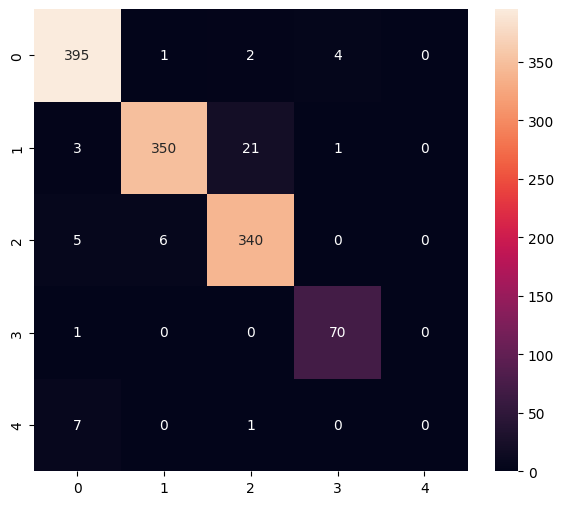

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       402
           1       0.98      0.93      0.96       375
           2       0.93      0.97      0.95       351
           3       0.93      0.99      0.96        71
           4       0.00      0.00      0.00         8

    accuracy                           0.96      1207
   macro avg       0.76      0.77      0.77      1207
weighted avg       0.95      0.96      0.95      1207



c:\Users\ASUS\Hand Gesture\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\Hand Gesture\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\Hand Gesture\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpix9r2cu7\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpix9r2cu7\assets


: 

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))